##ECSE 415 - Assignment 1: Image Filtering and Edge Detection

#Theo Ghanem 260972584

###**1. Image Acquisition**

Pictures were captured using iPhone Camera

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


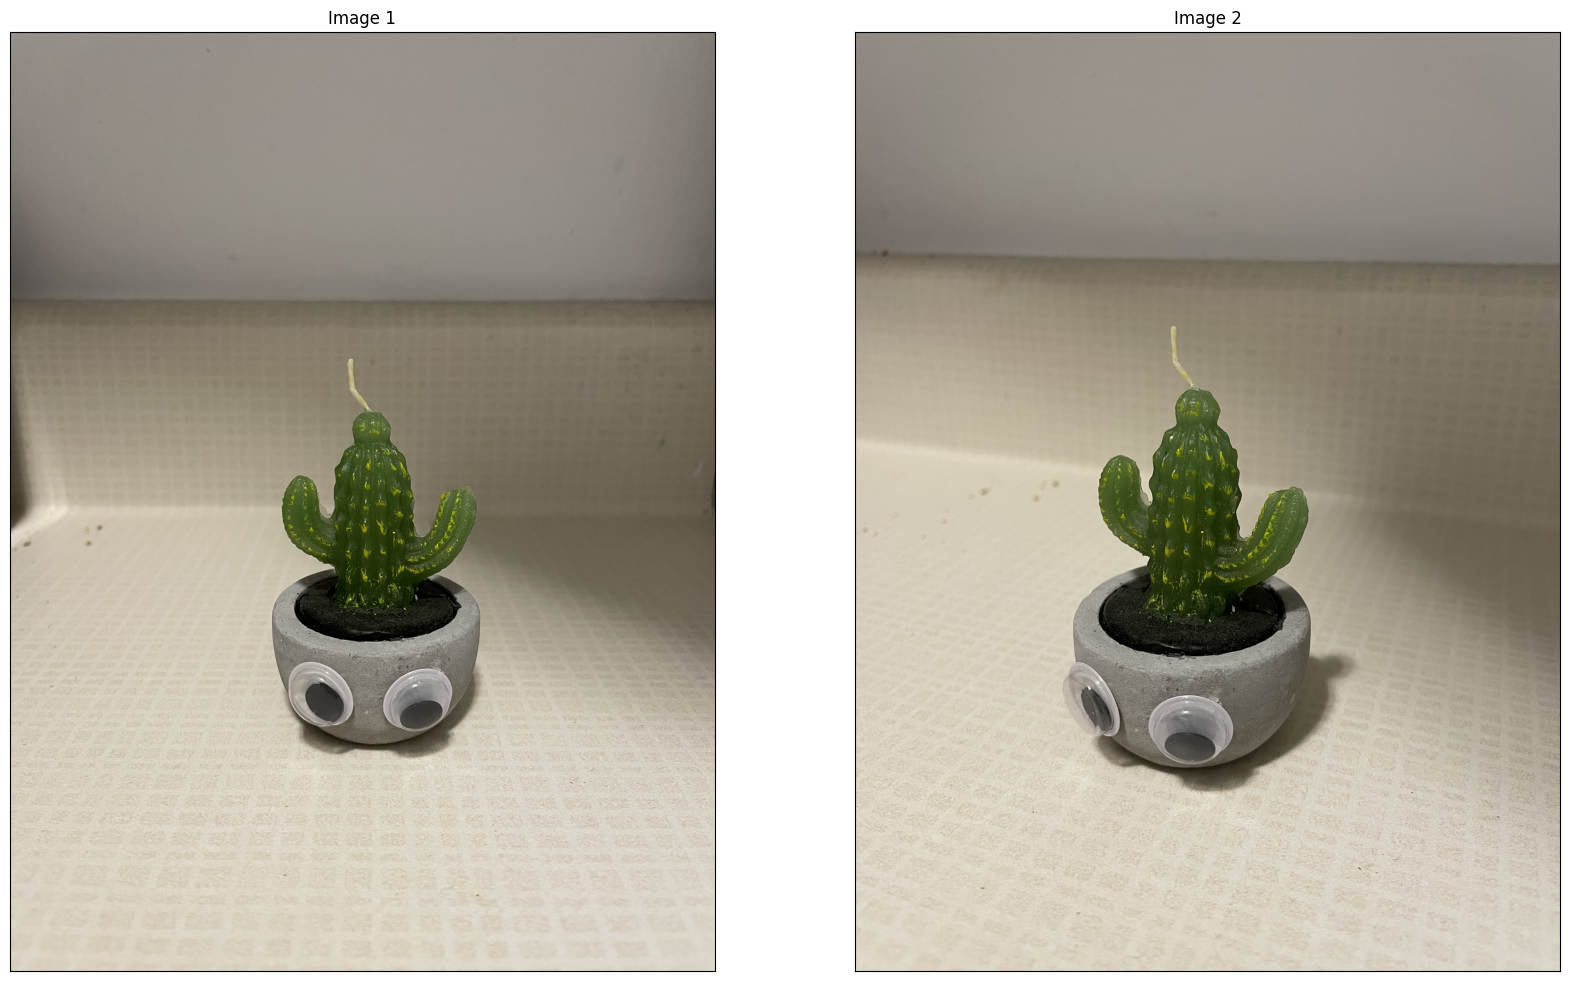

In [55]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/ECSE415_computer_vision/A1/'

#Load the 2 images

image1 = cv2.imread(path+'Image1.png')
image2 = cv2.imread(path+'Image2.png')

# From tutorial 2 we know that opencv reads image in BGR format while matplotlib
# displays it in RGB format, convert from BGR to RGB for displaying

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(image1) # 2x2 subplot, 1 selected
plt.title("Image 1"), plt.xticks([]), plt.yticks([]) # title and remove the axis ticks
plt.subplot(122), plt.imshow(image2) # 2x2 subplot, 2 selected
plt.title("Image 2"), plt.xticks([]), plt.yticks([])
plt.show()

###**2. Converting images to Grayscale**

Done by averaging each pixel’s R, G, and B values.

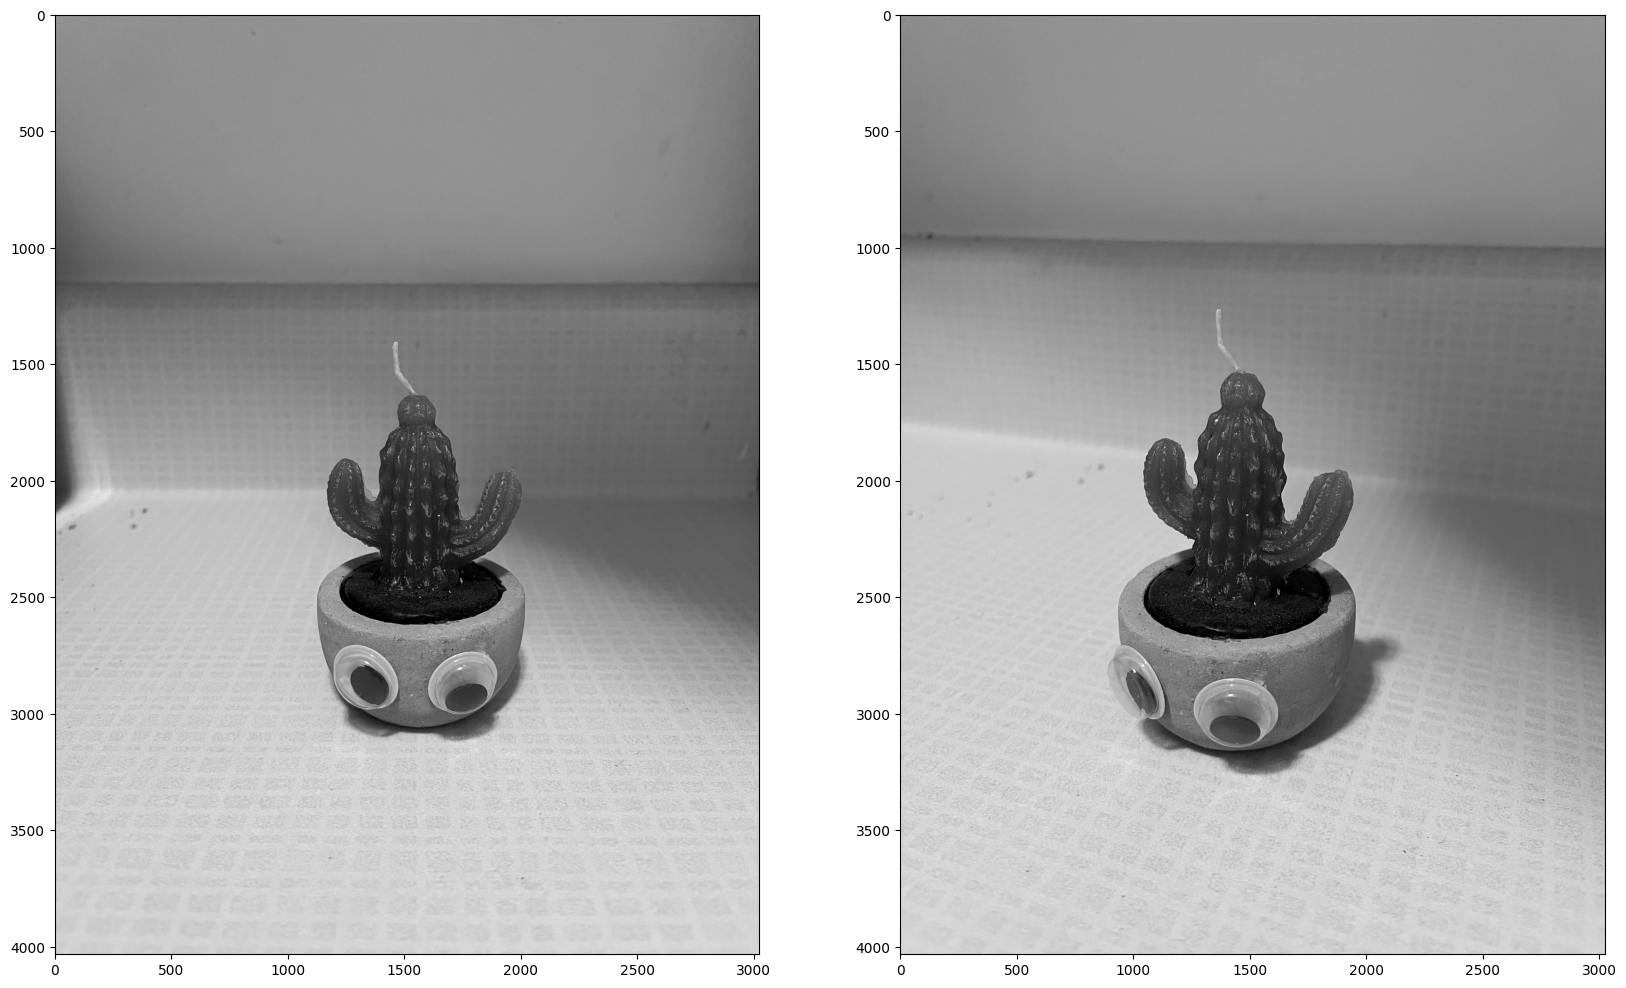

In [56]:
# mean the third axis of the images which corresponds to the color channels
image1_grayscale = image1.mean(axis=2)
image2_grayscale = image2.mean(axis=2)

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(image1_grayscale, cmap='gray')
plt.subplot(122)
plt.imshow(image2_grayscale, cmap='gray')


###**3. Smoothing images using Gaussian Blur**

The pair of grayscale images are smoothed using a :
- 5x5 pixel Gaussian kernel
- 11x11 Gaussian kernel

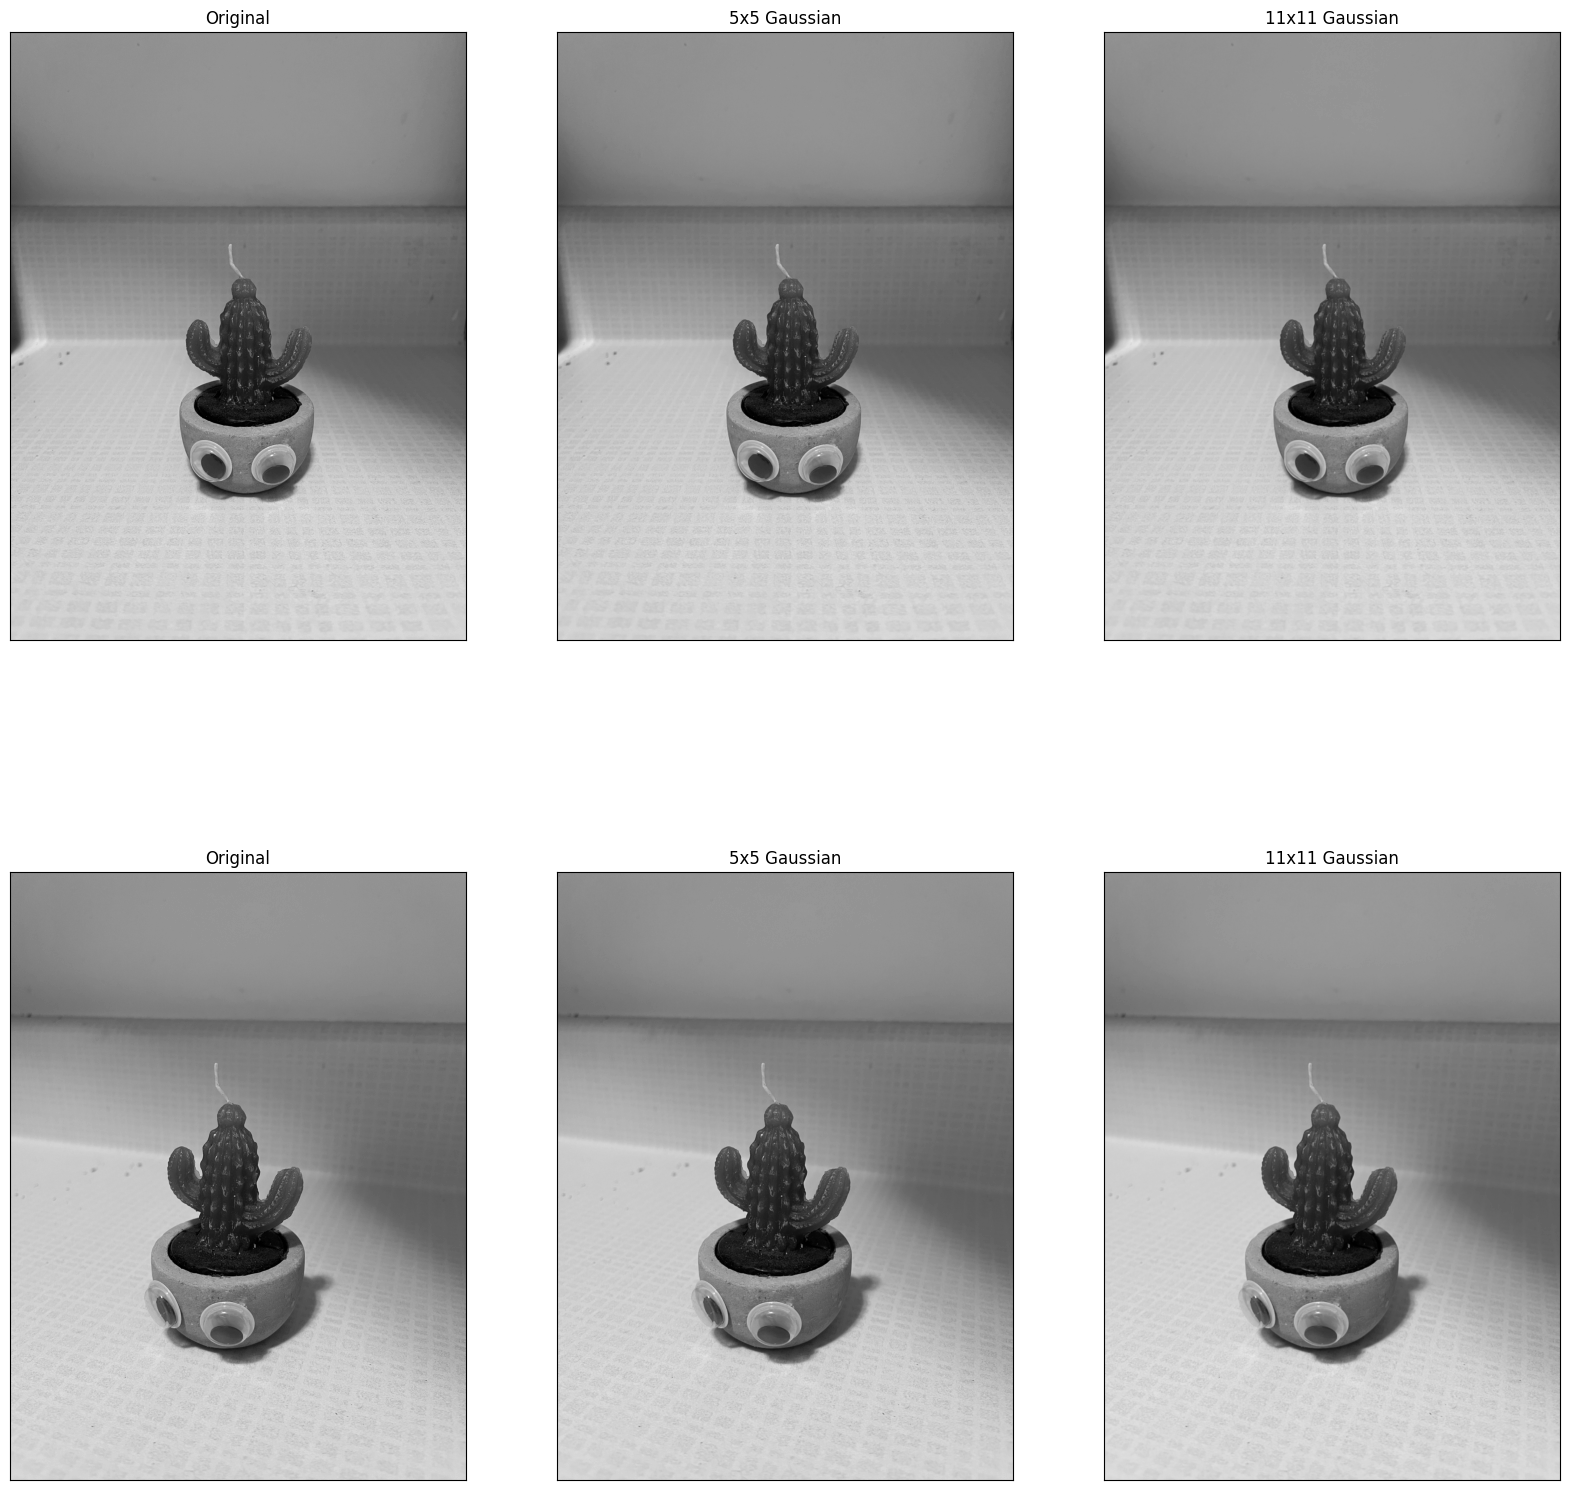

In [57]:
#Smoothing the images using Gaussian Blur as specified in Tutorial 2

# filter image using 5x5 Gaussian, the std is calculated automatically
image1_Gaussian_5 = cv2.GaussianBlur(image1_grayscale, (5,5), 0)
image2_Gaussian_5 = cv2.GaussianBlur(image2_grayscale, (5,5), 0)

# filter image using 11x11 Gaussian, the std is calculated automatically
image1_Gaussian_11 = cv2.GaussianBlur(image1_grayscale, (11,11), 0)
image2_Gaussian_11 = cv2.GaussianBlur(image2_grayscale, (11,11), 0)

# display images
plt.figure(figsize=(20,20))
plt.subplot(231), plt.imshow(image1_grayscale, cmap='gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(image1_Gaussian_5, cmap='gray')
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(image1_Gaussian_11, cmap='gray')
plt.title("11x11 Gaussian"), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(image2_grayscale, cmap='gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(image2_Gaussian_5, cmap='gray')
plt.title("5x5 Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(image2_Gaussian_11, cmap='gray')
plt.title("11x11 Gaussian"), plt.xticks([]), plt.yticks([])
plt.show()

###**4. Computing Image Gradients**

Computed the x and y derivative images of the smoothed images using the horizontal and vertical Sobel filters.

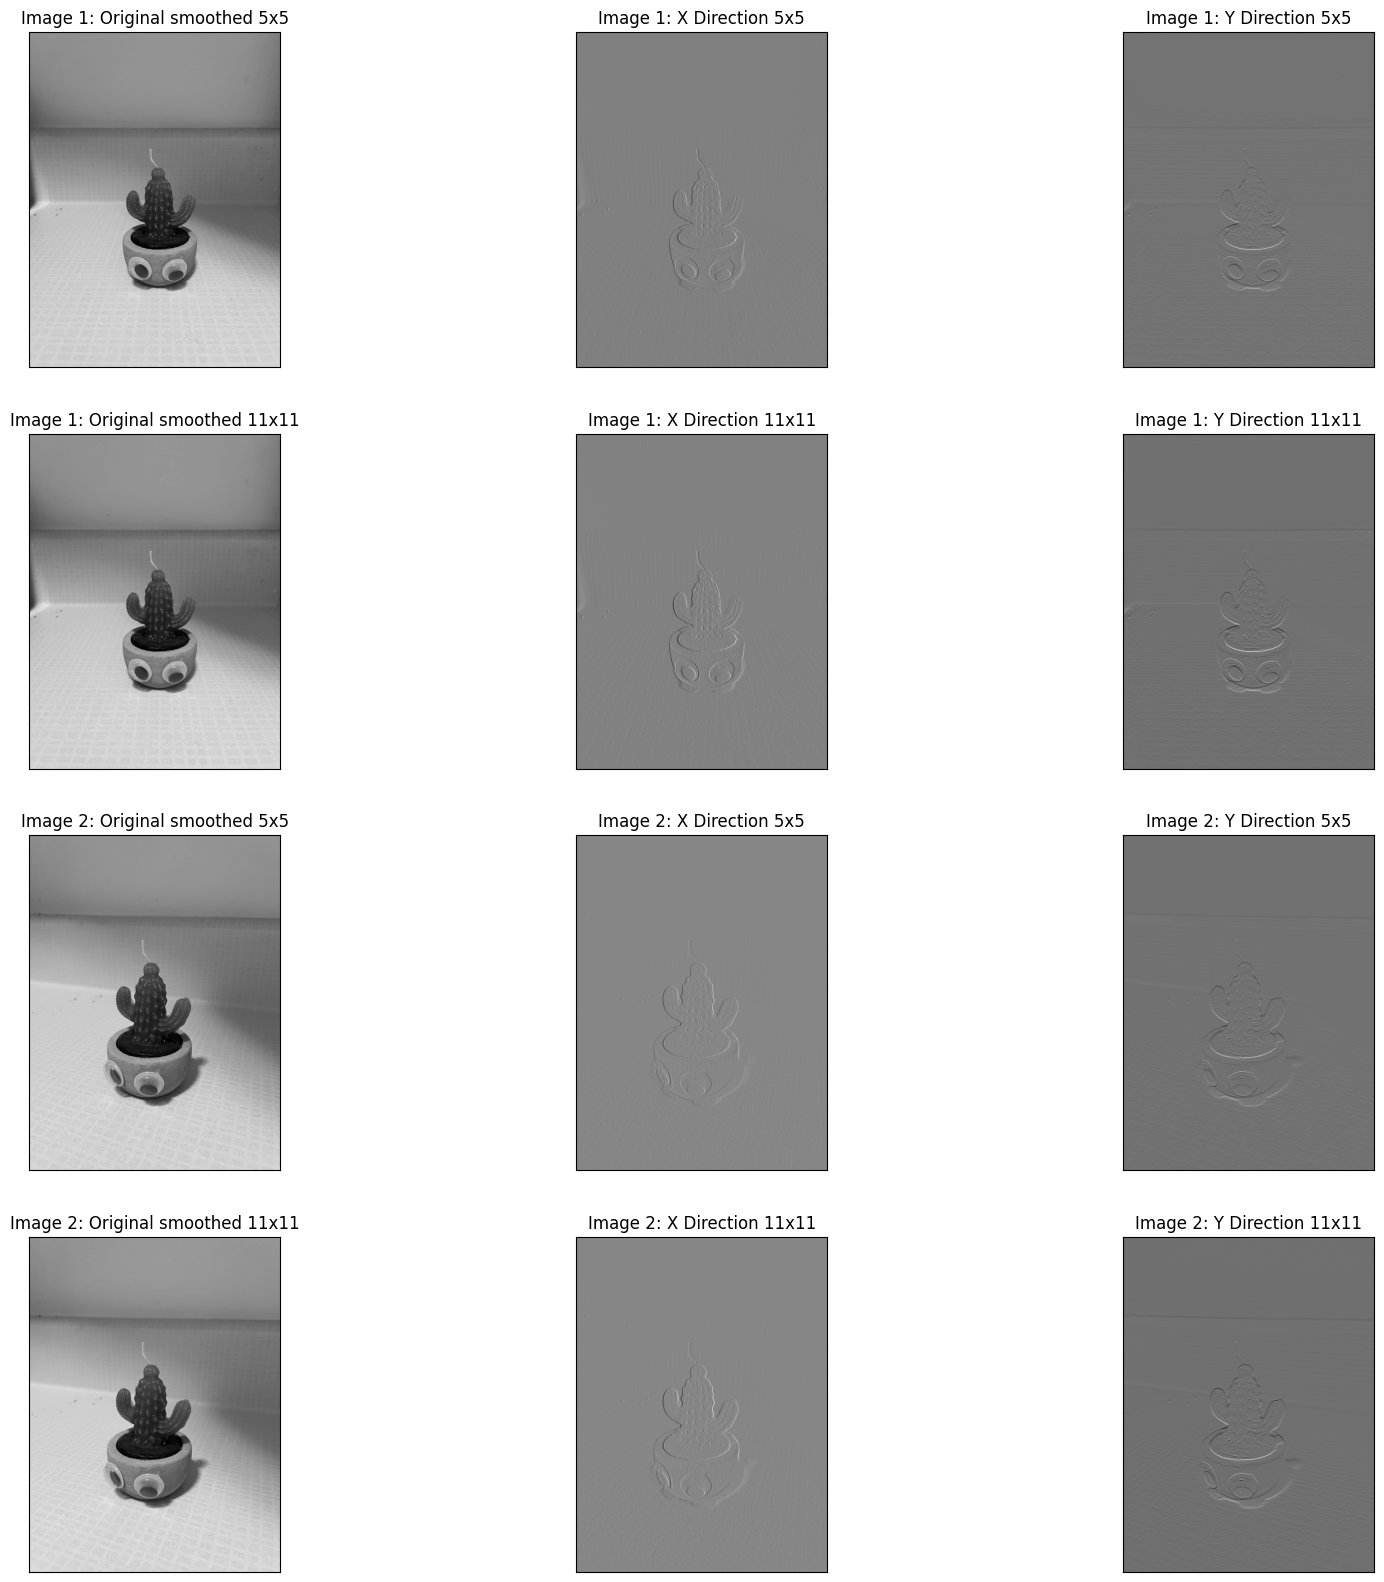

In [58]:
# Computer gradients in x and y directions for smoothed 5x5 and 11x11, for both images
# apply 15x15 Sobel filters to the intensity channel
image1_gradient_x_5 = cv2.Sobel(image1_Gaussian_5, cv2.CV_64F, 1, 0, ksize=21)
image1_gradient_y_5 = cv2.Sobel(image1_Gaussian_5, cv2.CV_64F, 0, 1, ksize=21)
image1_gradient_x_11 = cv2.Sobel(image1_Gaussian_11, cv2.CV_64F, 1, 0, ksize=21)
image1_gradient_y_11 = cv2.Sobel(image1_Gaussian_11, cv2.CV_64F, 0, 1, ksize=21)

image2_gradient_x_5 = cv2.Sobel(image2_Gaussian_5, cv2.CV_64F, 1, 0, ksize=21)
image2_gradient_y_5 = cv2.Sobel(image2_Gaussian_5, cv2.CV_64F, 0, 1, ksize=21)
image2_gradient_x_11 = cv2.Sobel(image2_Gaussian_11, cv2.CV_64F, 1, 0, ksize=21)
image2_gradient_y_11 = cv2.Sobel(image2_Gaussian_11, cv2.CV_64F, 0, 1, ksize=21)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(431), plt.imshow(image1_Gaussian_5, cmap="gray")
plt.title("Image 1: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(432), plt.imshow(image1_gradient_x_5, cmap="gray")
plt.title("Image 1: X Direction 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(433), plt.imshow(image1_gradient_y_5, cmap="gray")
plt.title("Image 1: Y Direction 5x5"), plt.xticks([]), plt.yticks([])

plt.subplot(434), plt.imshow(image1_Gaussian_11, cmap="gray")
plt.title("Image 1: Original smoothed 11x11"), plt.xticks([]), plt.yticks([])
plt.subplot(435), plt.imshow(image1_gradient_x_11, cmap="gray")
plt.title("Image 1: X Direction 11x11"), plt.xticks([]), plt.yticks([])
plt.subplot(436), plt.imshow(image1_gradient_y_11, cmap="gray")
plt.title("Image 1: Y Direction 11x11"), plt.xticks([]), plt.yticks([])

plt.subplot(437), plt.imshow(image2_Gaussian_5, cmap="gray")
plt.title("Image 2: Original smoothed 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(438), plt.imshow(image2_gradient_x_5, cmap="gray")
plt.title("Image 2: X Direction 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(439), plt.imshow(image2_gradient_y_5, cmap="gray")
plt.title("Image 2: Y Direction 5x5"), plt.xticks([]), plt.yticks([])

plt.subplot(4,3,10), plt.imshow(image2_Gaussian_11, cmap="gray")
plt.title("Image 2: Original smoothed 11x11"), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,11), plt.imshow(image2_gradient_x_11, cmap="gray")
plt.title("Image 2: X Direction 11x11"), plt.xticks([]), plt.yticks([])
plt.subplot(4,3,12), plt.imshow(image2_gradient_y_11, cmap="gray")
plt.title("Image 2: Y Direction 11x11"), plt.xticks([]), plt.yticks([])

plt.show()

###**5. Computing the Edge Magnitude and Orientation**

Computed the edge gradient magnitude and orientation of the smoothed images using the Sobel filter values.

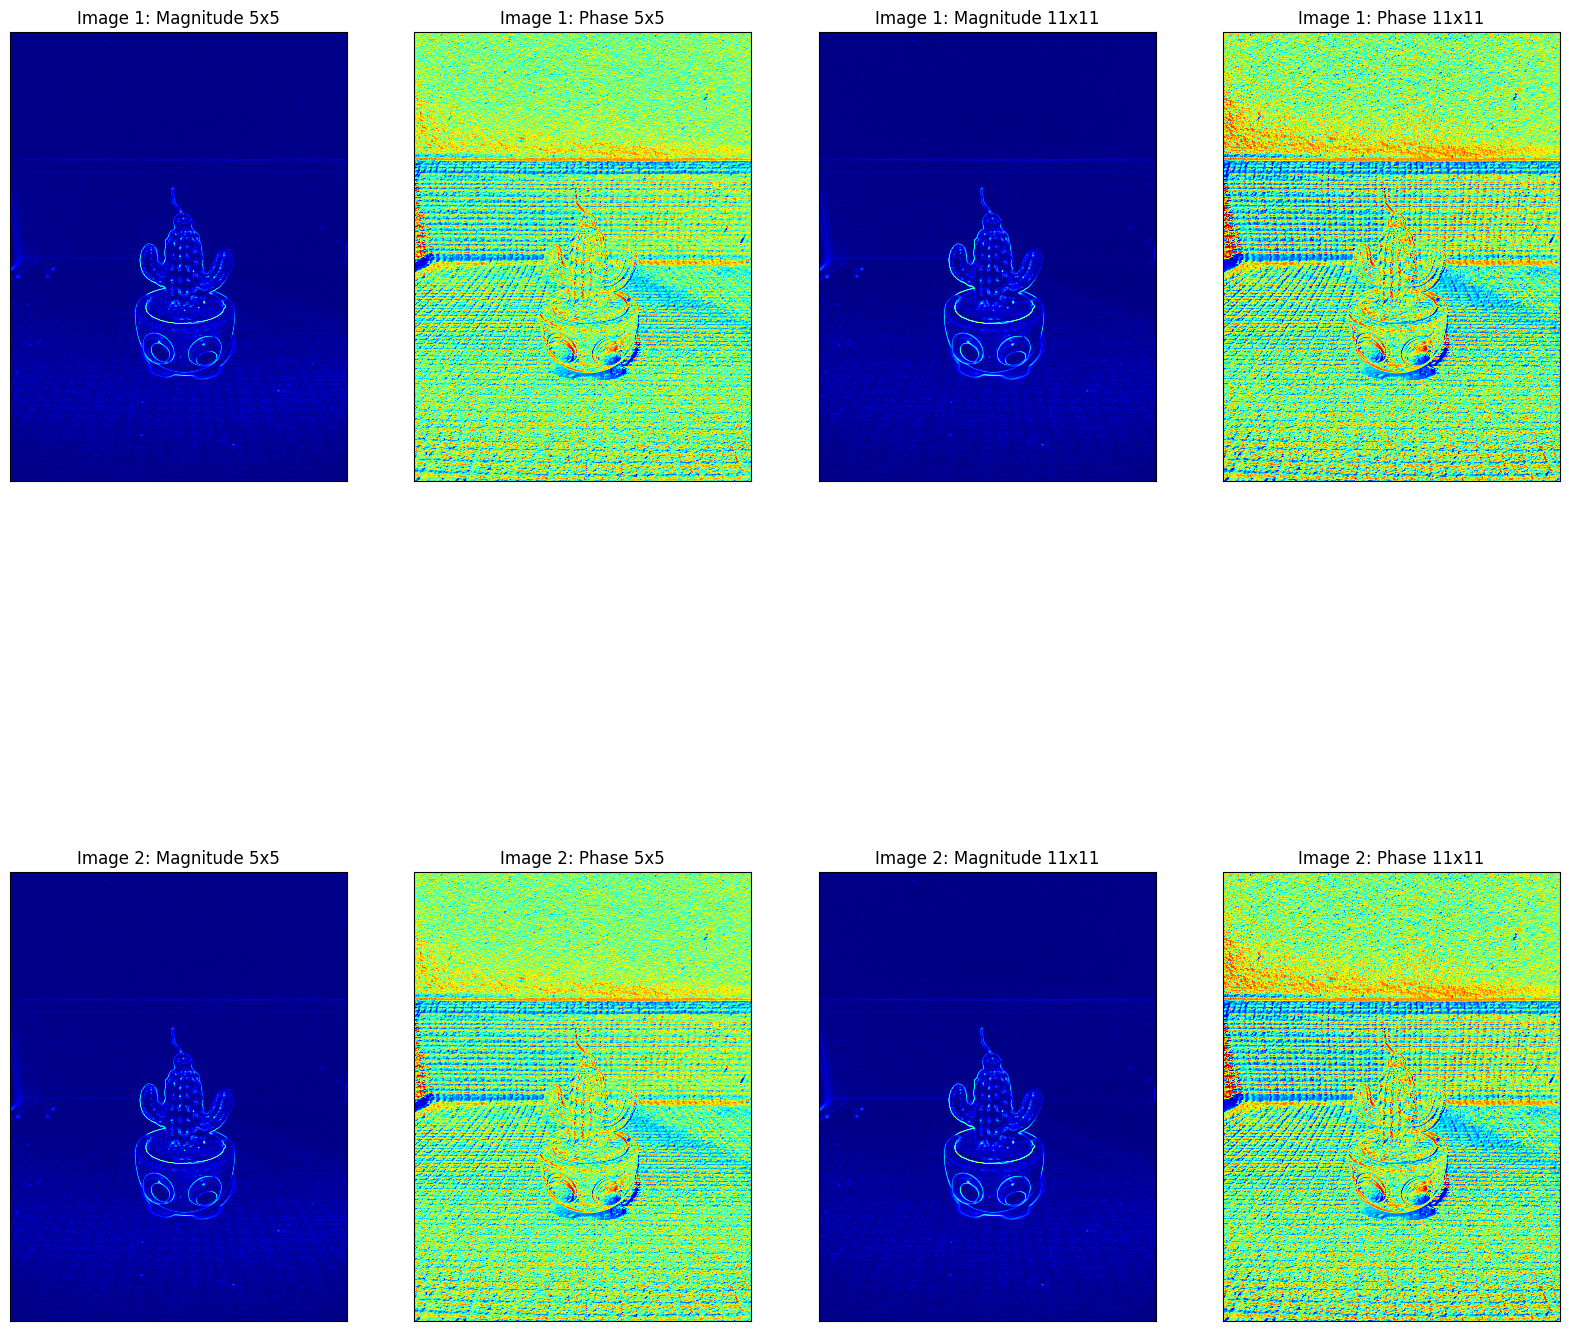

In [59]:
#Compute edge magnitude and orientation using sobel filter values (info from tutorial 3)

image1_magnitude_5 = cv2.magnitude(image1_gradient_x_5,image1_gradient_y_5)
image1_phase_5 = cv2.phase(image1_gradient_x_5,image1_gradient_y_5)
image1_magnitude_11 = cv2.magnitude(image1_gradient_x_11,image1_gradient_y_11)
image1_phase_11 = cv2.phase(image1_gradient_x_11,image1_gradient_y_11)

image2_magnitude_5 = cv2.magnitude(image2_gradient_x_5,image2_gradient_y_5)
image2_phase_5 = cv2.phase(image2_gradient_x_5,image2_gradient_y_5)
image2_magnitude_11 = cv2.magnitude(image2_gradient_x_11,image2_gradient_y_11)
image2_phase_11 = cv2.phase(image2_gradient_x_11,image2_gradient_y_11)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(241), plt.imshow(image1_magnitude_5, cmap="jet")
plt.title("Image 1: Magnitude 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(242), plt.imshow(image1_phase_5, cmap="jet")
plt.title("Image 1: Phase 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(243), plt.imshow(image1_magnitude_11, cmap="jet")
plt.title("Image 1: Magnitude 11x11"), plt.xticks([]), plt.yticks([])
plt.subplot(244), plt.imshow(image1_phase_11, cmap="jet")
plt.title("Image 1: Phase 11x11"), plt.xticks([]), plt.yticks([])

plt.subplot(245), plt.imshow(image1_magnitude_5, cmap="jet")
plt.title("Image 2: Magnitude 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(246), plt.imshow(image1_phase_5, cmap="jet")
plt.title("Image 2: Phase 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(247), plt.imshow(image1_magnitude_11, cmap="jet")
plt.title("Image 2: Magnitude 11x11"), plt.xticks([]), plt.yticks([])
plt.subplot(248), plt.imshow(image1_phase_11, cmap="jet")
plt.title("Image 2: Phase 11x11"), plt.xticks([]), plt.yticks([])

plt.show()

###**6. Canny edge detection**

Using the Canny edge detector implementation in opencv to compute the Canny edge detector on the 2 smoothed images.

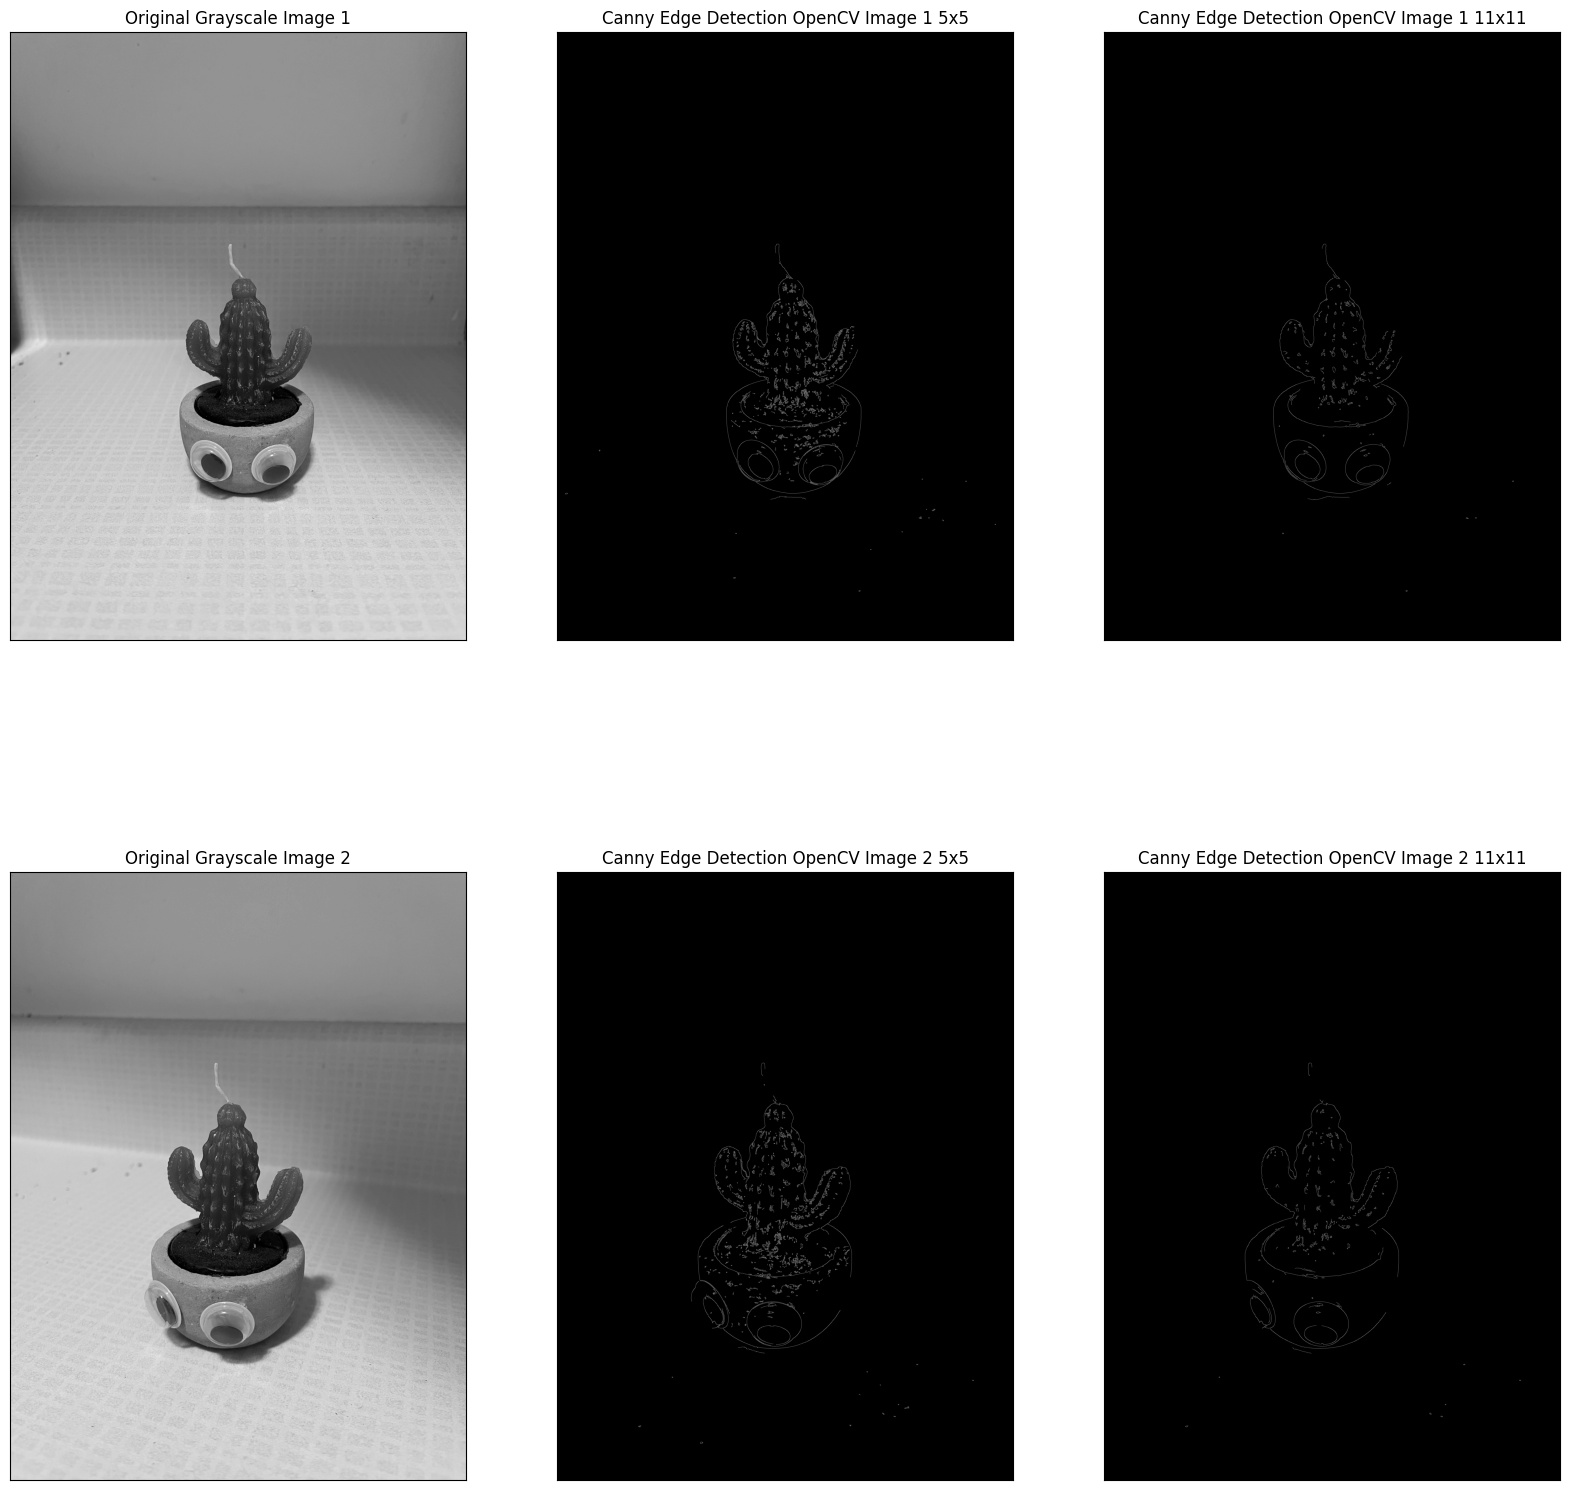

In [60]:
#Canny edge detection (info from Tutorial 3)

image1_canny_5 = cv2.Canny(np.uint8(image1_Gaussian_5), 50, 150)
image1_canny_11 = cv2.Canny(np.uint8(image1_Gaussian_11), 40, 120)
image2_canny_5 = cv2.Canny(np.uint8(image2_Gaussian_5), 50, 150)
image2_canny_11 = cv2.Canny(np.uint8(image2_Gaussian_11), 40, 120)

#display images
plt.figure(figsize=(20, 20))
plt.subplot(231), plt.imshow(image1_grayscale, cmap="gray")
plt.title("Original Grayscale Image 1"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(image1_canny_5, cmap="gray")
plt.title("Canny Edge Detection OpenCV Image 1 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(image1_canny_11, cmap="gray")
plt.title("Canny Edge Detection OpenCV Image 1 11x11"), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(image2_grayscale, cmap="gray")
plt.title("Original Grayscale Image 2"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(image2_canny_5, cmap="gray")
plt.title("Canny Edge Detection OpenCV Image 2 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(image2_canny_11, cmap="gray")
plt.title("Canny Edge Detection OpenCV Image 2 11x11"), plt.xticks([]), plt.yticks([])


plt.show()
